In [101]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/en/2017_up1/2017_up1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2017_up1/2017_up1_Cointelegraph.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2017_up1/2017_up1_Forbes.csv', error_bad_lines=False))


#data = pd.read_csv('../news/scraping_result/Coindesk_down_1(2018).csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../news/scraping_result/Cointelegraph_down_1(2018).csv', error_bad_lines=False))
#data = data.append(pd.read_csv('../news/scraping_result/Forbes_down_1(2018).csv', error_bad_lines=False))


In [102]:
text = data[['main article']]
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [103]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [109]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [110]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [114]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [115]:
article_contents = tokenized_doc.values.tolist()

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [117]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [118]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [119]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [120]:
word2id = defaultdict(lambda: 0)

In [121]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [122]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [123]:
len(tf_idf_result)

10333

In [124]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

10333


In [125]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [126]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"scammed" + 0.000*"magg" + 0.000*"conveniencein" + 0.000*"matthieu" + 0.000*"restructure" + 0.000*"bloombergthe" + 0.000*"raiu" + 0.000*"worship"')
(1, '0.001*"holt" + 0.001*"mcconnell" + 0.001*"aimp" + 0.001*"dyer" + 0.001*"bhim" + 0.001*"systembut" + 0.001*"brigham" + 0.001*"gregersen"')
(2, '0.002*"wendy" + 0.002*"socialize" + 0.002*"sear" + 0.002*"catalog" + 0.002*"hunch" + 0.002*"pennant" + 0.002*"dish" + 0.002*"pencil"')
(3, '0.000*"reggie" + 0.000*"digitthis" + 0.000*"torrent" + 0.000*"hubris" + 0.000*"layman" + 0.000*"synaps" + 0.000*"workflow" + 0.000*"reposition"')


In [127]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [128]:
sentences = article_contents

In [129]:
from gensim.models import Word2Vec

In [130]:
model = Word2Vec(sentences, min_count=1)

In [131]:
len(model.wv.vocab)

10333

In [132]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [133]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [134]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [135]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [136]:
temp_cluster_result['cluster'] = assigned_clusters

In [137]:
temp_cluster_result['raw_data'] = X.tolist()

In [138]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [139]:
from sklearn.metrics import pairwise_distances

In [140]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [141]:
len(cosine_centroid_list)

10333

In [142]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [143]:
sum(temp_distance[3])

128.7583545953853

In [144]:
import scipy.spatial.distance as dist

In [145]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0034601257180330025

In [146]:
dist.euclidean(X[0],cosine_centroid_list[0])

4.608495449251553

In [147]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [148]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [149]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  #거래소, 가격

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1,"[-0.5285095572471619, -0.6666286587715149, -0....",bitcoin,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.000938,0.457256,0.543682,NaN
28,"[-0.5377159714698792, -0.7024874091148376, -0....",blockchain,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.000876,0.271651,0.729225,NaN
39,"[-0.5755859017372131, -0.6679536700248718, -0....",market,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.001255,0.146848,0.854407,NaN
184,"[-0.5703540444374084, -0.7359092831611633, -0....",make,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.000125,0.137781,0.862344,NaN
334,"[-0.5677016973495483, -0.7076946496963501, -0....",company,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.000178,0.135470,0.864708,NaN
8,"[-0.5135648250579834, -0.64582759141922, -0.17...",time,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.001262,0.134581,0.866681,NaN
161,"[-0.5207163095474243, -0.6835417151451111, -0....",transaction,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.000894,0.125692,0.875202,NaN
26,"[-0.5358105301856995, -0.7033761739730835, -0....",technology,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.000702,0.119292,0.881410,NaN
337,"[-0.5548199415206909, -0.7325208187103271, -0....",work,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.000288,0.112003,0.888285,NaN
294,"[-0.6149435043334961, -0.7001950740814209, -0....",bank,0,"[-0.06630324, -0.08461573, -0.024671245, -0.15...",0.001584,0.108803,0.892781,NaN


In [150]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10,"[-0.6928310990333557, -0.7762585282325745, -0....",currency,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.007341,0.126581,0.880760,NaN
9,"[-0.652782142162323, -0.7638753652572632, -0.3...",digital,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.009366,0.107025,0.902342,NaN
17,"[-0.6073662042617798, -0.7187317609786987, -0....",asset,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.001300,0.061868,0.939432,NaN
67,"[-0.631123960018158, -0.7631712555885315, -0.2...",group,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.000172,0.051023,0.949149,NaN
72,"[-0.5697153210639954, -0.7773516178131104, -0....",image,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.006932,0.035912,0.971020,NaN
73,"[-0.4331668019294739, -0.4645483195781708, -0....",shutterstock,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.005490,0.029512,0.975978,NaN
69,"[-0.4378339946269989, -0.5589483380317688, -0....",stake,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.000421,0.021156,0.979265,NaN
68,"[-0.46128585934638977, -0.5597994327545166, -0...",ownership,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.000307,0.018489,0.981818,NaN
2136,"[-0.34684792160987854, -0.44184166193008423, -...",virtual,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.000729,0.014045,0.986684,NaN
1360,"[-0.2442118227481842, -0.2968795597553253, -0....",fiat,1,"[-0.014888583, -0.018175589, -0.00605918, -0.0...",0.001098,0.009956,0.991143,NaN


In [156]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4508,"[-0.023776499554514885, -0.02753872238099575, ...",treaty,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.004359,0.000533,1.003825,NaN
7463,"[-0.022014474496245384, -0.027990994974970818,...",dataset,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.008279,0.000356,1.007923,NaN
8217,"[-0.019201621413230896, -0.024776972830295563,...",statestate,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.008170,0.000178,1.007992,NaN
8442,"[-0.019170084968209267, -0.02209934964776039, ...",howe,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.008705,0.000178,1.008527,NaN
7193,"[-0.021258831024169922, -0.019833747297525406,...",opioid,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.009178,0.000356,1.008822,NaN
35,"[-0.01757231540977955, -0.02663242444396019, -...",hover,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.010008,0.001067,1.008941,NaN
3433,"[-0.016112560406327248, -0.022943247109651566,...",neutrality,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.009440,0.000356,1.009084,NaN
5280,"[-0.019603362306952477, -0.024108562618494034,...",launderers,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.009851,0.000533,1.009318,NaN
2167,"[-0.017688430845737457, -0.018711065873503685,...",whatever,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.009905,0.000356,1.009550,NaN
521,"[-0.017469244077801704, -0.01958359219133854, ...",irrelevant,2,"[-0.00669152, -0.008476687, -0.0026134409, -0....",0.010539,0.000711,1.009828,NaN


In [157]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 가격, 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2926,"[0.007627029903233051, 0.016263475641608238, 0...",kurman,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.060800,0.000178,1.060622,NaN
226,"[0.009818928316235542, 0.009784902445971966, 0...",unhindered,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.129988,0.000178,1.129810,NaN
2917,"[0.0010378914885222912, 0.006491738837212324, ...",buenos,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.183522,0.000178,1.183344,NaN
328,"[0.002472647000104189, 0.004570851568132639, -...",billboard,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.189144,0.000178,1.188967,NaN
2631,"[0.001326578902080655, 0.0019824348855763674, ...",grayscale,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.242416,0.000533,1.241883,NaN
9802,"[0.0023886116687208414, 0.005551579408347607, ...",convertible,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.256097,0.000178,1.255920,NaN
2928,"[0.006606096867471933, 0.006271734833717346, -...",graft,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.265687,0.000178,1.265509,NaN
1098,"[0.006770326755940914, 0.001270046690478921, -...",dear,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.268508,0.000178,1.268330,NaN
1152,"[0.004479772411286831, 0.005853663664311171, -...",reminisce,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.286186,0.000178,1.286008,NaN
9561,"[-0.0012142363702878356, 0.0071259899996221066...",durable,3,"[0.0015365805, 0.0024379988, 0.00048572297, 0....",0.293805,0.000178,1.293627,NaN


In [153]:
y_km = temp_cluster_result['cluster'].values

In [154]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

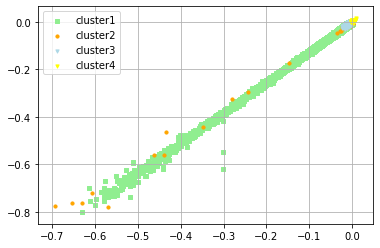

In [155]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [158]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 가격,거래소

8536

In [159]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

662

In [160]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인플

1088

In [161]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

47

In [162]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 가격,거래소
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 6 # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [163]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [164]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [165]:
kmeans.inertia_

623.490674632291

In [166]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 2 2 ... 1 1 1]


In [167]:
cluster_values= list(model.wv.vocab)

In [168]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-623.4906


In [169]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [170]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.73823917


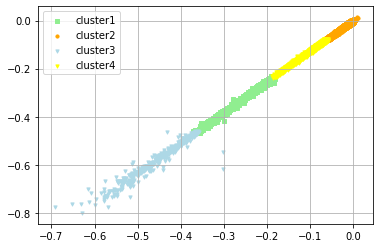

In [171]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [172]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [173]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [174]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [175]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [176]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [177]:
import scipy.spatial.distance as dist

In [178]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [179]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [180]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
424,"[-0.2581747770309448, -0.3334652781486511, -0....",imagine,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.028669,0.007289,1.021380,NaN
681,"[-0.2586573660373688, -0.33054468035697937, -0...",range,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.034070,0.010311,1.023758,NaN
259,"[-0.25602230429649353, -0.32686805725097656, -...",decide,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.035180,0.010311,1.024868,NaN
623,"[-0.26819977164268494, -0.3343089520931244, -0...",victim,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.033106,0.008000,1.025106,NaN
126,"[-0.26570925116539, -0.3322579264640808, -0.09...",mainstream,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.036189,0.010845,1.025344,NaN
250,"[-0.26130160689353943, -0.3347271680831909, -0...",mention,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.034493,0.008534,1.025959,NaN
1126,"[-0.2525179386138916, -0.3279575705528259, -0....",instance,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.036601,0.010311,1.026290,NaN
1635,"[-0.25523850321769714, -0.32734647393226624, -...",communication,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.037939,0.008000,1.029939,NaN
1298,"[-0.2626556158065796, -0.32812821865081787, -0...",management,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.041649,0.011556,1.030093,NaN
1784,"[-0.25671741366386414, -0.32592153549194336, -...",representative,0,"[-0.26015234, -0.33171558, -0.09712592, -0.611...",0.039769,0.008889,1.030880,NaN


In [188]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6323,"[-0.014850154519081116, -0.018318964168429375,...",groundwork,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026396,0.000533,1.025863,NaN
7461,"[-0.017387351021170616, -0.019005930051207542,...",craib,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026344,0.000356,1.025988,NaN
5138,"[-0.019257713109254837, -0.018133999779820442,...",tipbot,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026400,0.000356,1.026044,NaN
3796,"[-0.01687145046889782, -0.019740119576454163, ...",provoke,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026452,0.000356,1.026096,NaN
8865,"[-0.019227726384997368, -0.019840115681290627,...",deed,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026580,0.000356,1.026225,NaN
2259,"[-0.014835985377430916, -0.02224797010421753, ...",fuzzy,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026860,0.000533,1.026327,NaN
521,"[-0.017469244077801704, -0.01958359219133854, ...",irrelevant,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.027073,0.000711,1.026362,NaN
4062,"[-0.022242549806833267, -0.026863519102334976,...",pramod,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026664,0.000178,1.026487,NaN
3951,"[-0.015905611217021942, -0.02011553756892681, ...",amend,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026911,0.000356,1.026555,NaN
3516,"[-0.017833368852734566, -0.026174521073698997,...",existential,1,"[-0.017578173, -0.022438485, -0.0065260194, -0...",0.026996,0.000356,1.026640,NaN


In [182]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
725,"[-0.46194541454315186, -0.5986185073852539, -0...",product,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.056133,0.030223,1.025910,NaN
873,"[-0.4519304931163788, -0.5884811282157898, -0....",computer,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.062336,0.022578,1.039757,NaN
204,"[-0.4649016857147217, -0.5962392091751099, -0....",customer,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.074762,0.033601,1.041161,NaN
660,"[-0.4710980951786041, -0.6045979261398315, -0....",keep,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.071344,0.027023,1.044321,NaN
1080,"[-0.464861124753952, -0.5988419055938721, -0.1...",name,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.061788,0.017423,1.044365,NaN
902,"[-0.4649052023887634, -0.5907555222511292, -0....",launch,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.083666,0.036090,1.047576,NaN
1842,"[-0.4539724290370941, -0.5929595232009888, -0....",feature,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.075071,0.023467,1.051604,NaN
460,"[-0.45615214109420776, -0.5810846090316772, -0...",happen,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.080208,0.026134,1.054074,NaN
478,"[-0.46694377064704895, -0.6031966805458069, -0...",risk,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.080712,0.025423,1.055289,NaN
180,"[-0.4762749671936035, -0.5870360136032104, -0....",report,2,"[-0.4625036, -0.58969283, -0.17290522, -1.0853...",0.087375,0.030401,1.056975,NaN


In [183]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2203,"[-0.10532844066619873, -0.13753899931907654, -...",argument,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.028199,0.003200,1.024999,NaN
1671,"[-0.10475540906190872, -0.135209858417511, -0....",association,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.027944,0.002311,1.025632,NaN
998,"[-0.10999630391597748, -0.1401030719280243, -0...",complicate,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.030049,0.003911,1.026138,NaN
1249,"[-0.1091264933347702, -0.1319984644651413, -0....",crisis,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.030779,0.003556,1.027223,NaN
1032,"[-0.11054815351963043, -0.13563521206378937, -...",joint,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.030479,0.002845,1.027634,NaN
2883,"[-0.10684837400913239, -0.14155977964401245, -...",offline,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.030846,0.003200,1.027646,NaN
1008,"[-0.11312802881002426, -0.13848286867141724, -...",clue,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.029892,0.002133,1.027758,NaN
1420,"[-0.1103125661611557, -0.13210013508796692, -0...",towards,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.030673,0.002667,1.028007,NaN
1266,"[-0.11017429828643799, -0.13804535567760468, -...",cold,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.031523,0.003378,1.028145,NaN
2416,"[-0.11138109862804413, -0.13853149116039276, -...",cybersecurity,3,"[-0.10692513, -0.13620427, -0.03989967, -0.251...",0.030534,0.002311,1.028223,NaN


In [189]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #투자

544

In [190]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #인플

8112

In [191]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #비즈

337

In [192]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #협업

1340

In [193]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 11 # 트자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 8 # 협업

In [194]:
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.73823917 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.73823917

In [195]:
temp_cluster_result1.to_csv("../cluster/en_news/2017_up1/en_news_2017_up1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2017_up1/en_news_2017_up1_cosine.csv")

In [89]:
word_vectors = model.wv

In [90]:
vocabs = word_vectors.vocab.keys()

In [91]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [92]:
print(word_vectors.similarity(w1='little',w2='push'))

0.9999126


In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [94]:
xys

array([[ 4.66657542e+00, -7.89713954e-02],
       [ 4.78931862e+00, -3.23727026e-02],
       [ 4.84632327e+00, -1.07036537e-01],
       ...,
       [-4.39799787e-01,  5.73425644e-03],
       [-4.48562348e-01,  3.19504096e-04],
       [-4.64857761e-01, -3.86029343e-03]])

In [95]:
xys[:,0]

array([ 4.66657542,  4.78931862,  4.84632327, ..., -0.43979979,
       -0.44856235, -0.46485776])

In [96]:
xys[:,1]

array([-0.0789714 , -0.0323727 , -0.10703654, ...,  0.00573426,
        0.0003195 , -0.00386029])

In [97]:
xs = xys[:,0]
ys = xys[:,1]

In [98]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

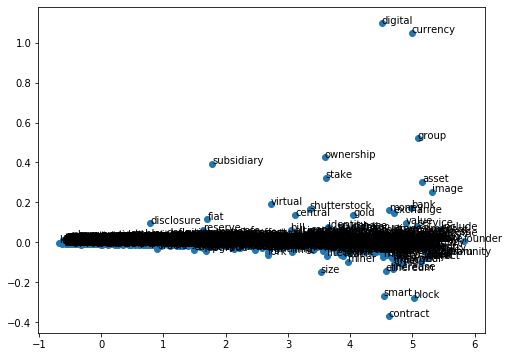

In [99]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>